Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2021/2022
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Procjena parametara

*Verzija: 1.0
Zadnji put ažurirano: 1. listopada 2021.*

(c) 2015-2021 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **19. prosinca 2021. u 23:59h**

------------------------------

### Upute

Ova laboratorijska vježba sastoji se od tri zadatka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [49]:
# Učitaj osnovne biblioteke...
import sklearn
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import pgmpy as pgm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\dsmoljan\miniconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['beta', 'norm']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


### 1. Procjena maksimalne izglednosti

#### (a)

Definirajte funkciju izglednosti $\mathcal{L}(\mu|\mathcal{D})$ za skup $\mathcal{D}=\{x^{(i)}\}_{i=1}^N$ Bernoullijevih varijabli. Neka od $N$ varijabli njih $m$ ima vrijednost 1 (npr. od $N$ bacanja novčića, $m$ puta smo dobili glavu). Definirajte funkciju izglednosti tako da je parametrizirana s $N$ i $m$, dakle definirajte funkciju $\mathcal{L}(\mu|N,m)$. 

In [50]:
def L(mi, N, m):
    return (mi**m)*((1-mi)**(N-m))

#### (b)

Prikažite funkciju $\mathcal{L}(\mu|N,m)$ za (1) $N=10$ i $m=1,2,5,9$ te za (2) $N=100$ i $m=1,10,50,90$ (dva zasebna grafikona).

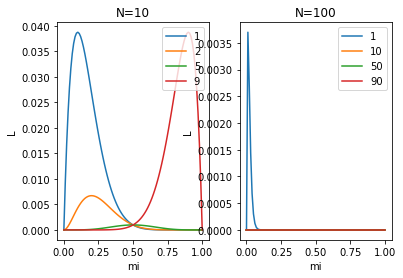

In [51]:
N = 10

mi = linspace(0,1,100)
plt.subplot(1,2,1)
for m in [1,2,5,9]:
    plt.plot(mi, L(mi, N, m))
    plt.title("N=10")
    plt.xlabel("mi")
    plt.ylabel("L")
    legend([1,2,5,9], loc = 'upper right')

N = 100
plt.subplot(1,2,2)
for m in [1,10,50,90]:
    plt.plot(mi, L(mi, N, m))
    plt.title("N=100")
    plt.xlabel("mi")
    plt.ylabel("L")
    legend([1,10,50,90], loc = 'upper right')
    

#MLE procjeni odgovara ona vrijednost za koju je L najveći, i.e za m = 1, to je cca. 0.1, za m = 9, to je cca. 0.9 itd.
#zatp što MLE daje kreće od pretpostavke "ako sam dobio ovu distirbuciju u podacima, to je sigurno najvjerojatnija distribucija, te stoga mora biti ispravna", te vraćs onaj
#parametar za koji je ta distribucija najizglednija. Problem s ovim pristupom je potencijalna prenaučenost 
    

**Q:** Koja vrijednost odgovara ML-procjenama i zašto?

#### (c)

Prikažite funkciju $\mathcal{L}(\mu|N,m)$ za $N=10$ i $m=\{0,9\}$.

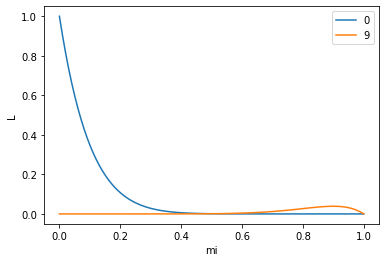

In [52]:
mi = linspace(0,1,100)
N = 10
for m in [0,9]:
    plt.xlabel("mi")
    plt.ylabel("L")
    plt.plot(mi, L(mi,N,m))
    legend([0,9], loc = 'upper right')

**Q:** Koja je ML-procjena za $\mu$ i što je problem s takvom procjenom u ovome slučaju?

### 2. Procjena maksimalne aposteriorne vjerojatnosti

#### (a)

Prikažite beta-distribuciju $B(\mu|\alpha,\beta)$ za različite kombinacije parametara $\alpha$ i $\beta$, uključivo $\alpha=\beta=1$ te $\alpha=\beta=2$.

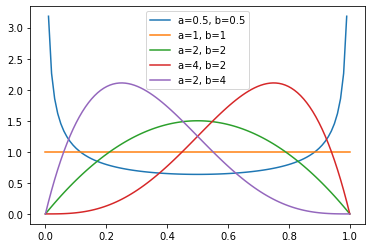

In [53]:
from scipy.stats import beta

mi = linspace(0,1,100)

pairs = [(0.5,0.5), (1,1), (2,2), (4,2), (2,4)]

for p in pairs:
    plt.plot(mi, beta.pdf(mi, p[0],p[1]), label="a=" + str(p[0]) + ", b=" + str(p[1]))

legend(loc = 'best')

# koristimo Beta distribuciu jer je konjugantna Bernoullijevoj distribuciji, koja odgovara slučajnoj varijabli bacanja novčića
# za novčić koji češće pada na glavu (dakle češće je 1 nego 0) -> graf bi naginjao na desnu stranu, stoga bi odabrao Beta(a=2, b=4)

**Q:** Koje parametere biste odabrali za modeliranje apriornog znanja o parametru $\mu$ za novčić za koji mislite da je "donekle pravedan, ali malo češće pada na glavu"? Koje biste parametre odabrali za novčić za koji držite da je posve pravedan? Zašto uopće koristimo beta-distribuciju, a ne neku drugu?

#### (b)

Definirajte funkciju za izračun zajedničke vjerojatnosti $P(\mu,\mathcal{D}) = P(\mathcal{D}|\mu) \cdot P(\mu|\alpha,\beta)$ te prikažite tu funkciju za $N=10$ i $m=9$ i nekolicinu kombinacija parametara $\alpha$ i $\beta$. 

C:\Users\dsmoljan\AppData\Local\Temp/ipykernel_7336/1371853491.py:2: RuntimeWarning: invalid value encountered in multiply
  return L(mi,N,m)*beta.pdf(mi,a,b)


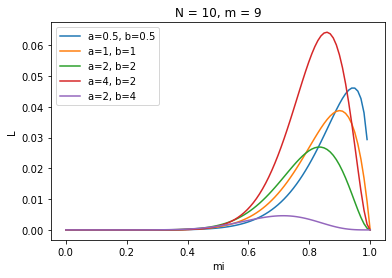

In [54]:
def PmiD(mi,N,m,a,b):
    return L(mi,N,m)*beta.pdf(mi,a,b)

mi = linspace(0,1,100)

N = 10
m = 9

pairs = [(0.5,0.5), (1,1), (2,2), (4,2), (2,4)]

for p in pairs:
    a = p[0]
    b = p[1]
    plt.plot(mi, PmiD(mi,N,m,a,b), label="a=" + str(p[0]) + ", b=" + str(p[1]))

plt.xlabel("mi")
plt.ylabel("L")
plt.title("N = 10, m = 9")
legend(loc = 'best')

**Q**: Koje vrijednosti odgovaraju MAP-procjeni za $\mu$? Usporedite ih sa ML-procjenama.

#### (c)

Za $N=10$ i $m=1$, na jednome grafikonu prikažite sve tri distribucije: $P(\mu,\mathcal{D})$, $P(\mu|\alpha,\beta)$ i $\mathcal{L}(\mu|\mathcal{D})$.

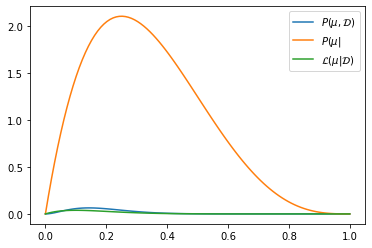

In [55]:
a = 2
b = 4
N = 10
m = 1
mi = linspace(0,1,100)

plt.plot(mi, PmiD(mi,N,m,a,b), label='$P(\mu,\mathcal{D})$')
plt.plot(mi, beta.pdf(mi,a,b), label='$P(\mu |\alfa, \beta)$')
plt.plot(mi, L(mi,N,m), label='$\mathcal{L}(\mu |\mathcal{D})$')
legend(loc = 'best')

### 3. Analiza skupa podataka *Iris*

#### (a)

Učitajte skup podataka *Iris* korištenjem funkcije [`load_iris`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). Taj skup sadrži $n=4$ značajke i $K=3$ klase. Odaberite jednu klasu i odaberite sve primjere iz te klase, dok ostale primjere zanemarite (**u nastavku radite isključivo s primjerima iz te jedne klase**). Vizualizirajte podatke tako da načinite 2D-prikaze za svaki par značajki (šest grafikona; za prikaz je najjednostavnije koristiti funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)).

**NB:** Mogla bi Vam dobro dući funkcija [`itertools.combinations`](https://docs.python.org/2/library/itertools.html#itertools.combinations).

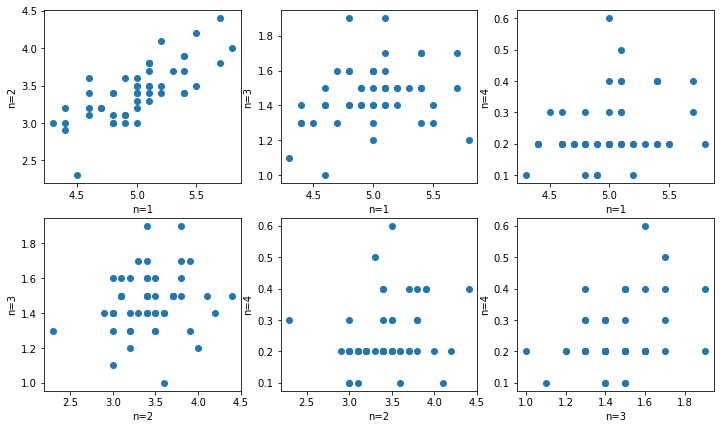

In [56]:
from sklearn.datasets import load_iris
import itertools as it

plt.figure(figsize=(12,7))
iris = load_iris()
y = iris.target == 0
X = iris.data[y]
combinations = it.combinations(range(0,4), 2)
ind = 0
for i,j in combinations:
    ind += 1
    plt.subplot(2,3,ind)
    scatter(X[:,i],X[:,j])
    plt.ylabel("n=" + str(j+1))
    plt.xlabel("n=" + str(i+1))
    

#### (b)

Pogledajte opis modula [`stats`](http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) te proučite funkciju [`norm`](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.norm.html#scipy.stats.norm). Implementirajte funkciju log-izglednosti za parametre $\mu$ i $\sigma^2$ normalne distribucije.

In [57]:
from scipy.stats import norm

def L_gauss(x, mi, sigma):
    return sum(norm(mi,sigma).logpdf(x))

#### (c)
Izračunajte ML-procjene za $(\mu, \sigma^2)$ za svaku od $n=4$ značajki iz skupa *Iris*. Ispišite log-izglednosti tih ML-procjena. 

In [58]:
def ML_est_mi(D):
    return sum(D)/D.size

def ML_est_sigma(D):
    sum_square = 0
    mi_est = ML_est_mi(D)
    for xi in D:
        sum_square += (xi-mi_est)**2
    return sum_square/D.size

for i in range(4):
    D = X[:,i]
    print("Značajka " + str(i+1) +":")
    print("Procjena srednje vrijednosti:" + str(ML_est_mi(D)))
    print("Procjena varijance: " + str(ML_est_sigma(D)))
    print("Log-izglednost: " + str(L_gauss(D, ML_est_mi(D), ML_est_sigma(D))))
    print("-----------------------------------------")

Značajka 1:
Procjena srednje vrijednosti:5.006
Procjena varijance: 0.12176400000000001
Log-izglednost: -145.9785998602527
-----------------------------------------
Značajka 2:
Procjena srednje vrijednosti:3.428
Procjena varijance: 0.14081600000000002
Log-izglednost: -125.46850995593098
-----------------------------------------
Značajka 3:
Procjena srednje vrijednosti:1.4620000000000002
Procjena varijance: 0.02955600000000001
Log-izglednost: -715.7254432335053
-----------------------------------------
Značajka 4:
Procjena srednje vrijednosti:0.24599999999999997
Procjena varijance: 0.010884000000000007
Log-izglednost: -2116.8735046208276
-----------------------------------------


#### (d)

Proučite funkciju [`pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) za izračun Pearsonovog koeficijenta korelacije. Izračunajte koeficijente korelacije između svih četiri značajki u skupu *Iris*. 

In [59]:
from scipy.stats import pearsonr

combinations = it.combinations(range(0,4), 2)

for i,j in combinations:
    coef = pearsonr(X[:,i],X[:,j])[0]
    print("Koeficijent između značajke " + str(i) + " i značajke " + str(j) + " je: " + str(coef))

Koeficijent između značajke 0 i značajke 1 je: 0.7425466856651599
Koeficijent između značajke 0 i značajke 2 je: 0.26717575886875716
Koeficijent između značajke 0 i značajke 3 je: 0.27809835293596974
Koeficijent između značajke 1 i značajke 2 je: 0.17769996678227074
Koeficijent između značajke 1 i značajke 3 je: 0.23275201136287943
Koeficijent između značajke 2 i značajke 3 je: 0.33163004080411873


#### (e)

Proučite funkciju [`cov`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html) te izračunajte ML-procjenu za kovarijacijsku matricu za skup *Iris*. Usporedite pristranu i nepristranu procjenu. Pokažite da se razlika (srednja apsolutna i kvadratna) smanjuje s brojem primjera (npr. isprobajte za $N/4$ i $N/2$ i $N$ primjera).

In [67]:
N = [int(X.size/4), int(X.size/2), int(X.size)]

for n in N:
    cov_matrix_unbiased = cov(X[0:n,:], rowvar=False, bias=False)
    cov_matrix_biased = cov(X[0:n,:], rowvar=False, bias=True)    

    print("N = " + str(n))
    print("Srednja apsolutna razlika: " + str(mean(abs(cov_matrix_unbiased-cov_matrix_biased))))
    print("Srednja kvadratna razlika: " + str(mean((cov_matrix_unbiased-cov_matrix_biased)**2)))
    print("----------------------------------------------------")

N = 50
Srednja apsolutna razlika: 0.0007689234693877533
Srednja kvadratna razlika: 1.451848323615155e-06
----------------------------------------------------
N = 100
Srednja apsolutna razlika: 0.0007689234693877533
Srednja kvadratna razlika: 1.451848323615155e-06
----------------------------------------------------
N = 200
Srednja apsolutna razlika: 0.0007689234693877533
Srednja kvadratna razlika: 1.451848323615155e-06
----------------------------------------------------
